In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import collections

# Task 0

In [0]:
# import the GeneExpression_Baseline.csv file using pandas library
gene_baseline = pd.read_csv('GeneExpression_Baseline.csv')
gene_metformin = pd.read_csv('GeneExpression_Metformin.csv')

In [35]:
gene_baseline.head()

,GeneID,Chr,Start,Stop,CodingLength,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,...,BaselineCell_183,BaselineCell_184,BaselineCell_185,BaselineCell_186,BaselineCell_187,BaselineCell_188,BaselineCell_189,BaselineCell_190,BaselineCell_191,BaselineCell_192
0,DDX11L1,chr1,11874,14408,1651,61,47,72,77,75,...,39,34,28,25,30,29,92,26,43,33
1,WASH7P,chr1,14362,29370,1769,72,60,79,80,81,...,26,26,19,26,19,22,96,33,32,44
2,FAM138A,chr1,34611,36081,1130,159,182,152,133,147,...,59,64,44,51,47,54,145,57,65,59
3,FAM138F,chr1,34611,36081,1130,64,54,88,92,63,...,24,31,23,19,25,33,86,45,25,20
4,OR4F5,chr1,69091,70008,918,61,57,63,61,69,...,40,41,17,25,27,27,99,31,32,29


In [0]:
gene_baseline.index = gene_baseline['GeneID']
gene_metformin.index = gene_metformin['GeneID']
gene_baseline = gene_baseline.drop(columns=['GeneID'])
gene_metformin = gene_metformin.drop(columns=['GeneID'])

In [37]:
gene_baseline.shape

(23346, 196)

### 1.

Cancer can occur when the genetic regions involved in regulating gene expression change. It's important to identify genes whose expression was altered, not by mutation but as a result of changes in the genetic regions that regulate them. The biologists wish to identify genes with significantly altered expression induced by metformin as well as the pathways associated with these genes since cancer-targeting drugs usually work by altering the expression of genes involved in crucial pathways. Identification of these genes can help biologists design laboratory experiments to establish the molecular mechanism of metformin in triple-negative breast cancer, and ultimately help clinicians provide better care to the patients. 


Reference: https://www.sciencedaily.com/releases/2018/07/180710113505.htm, MP2_README.pdf

### 2.

192 cells were sequenced (As seen from the dataframe it starts from BaselineCell_1 to BaselineCell_192)

### 3.

In [0]:
#gene_baseline.duplicated('GeneID')

Since all the genes are unique in the gene_baseline dataframe, that means 23346 genes were sequenced

### 4.

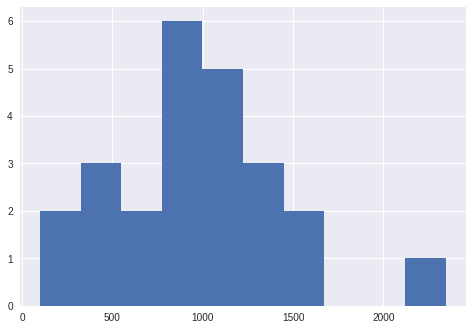

In [39]:
# using a bar chart to understand the distribution
plt.hist(gene_baseline.groupby('Chr').size())
plt.show()

As seen from the above graph, the chromosomes are not equally distributed as there is a lot of variance in the values.

### 5.

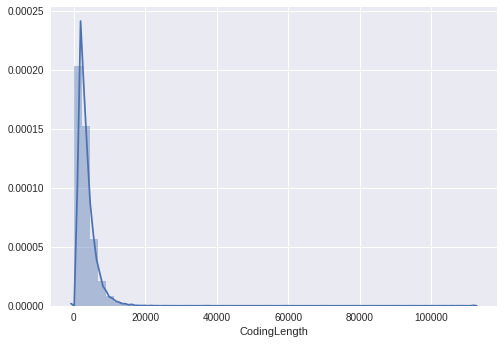

In [40]:
# using seaborn library to plot the distribution of Coding Length
sns.distplot(gene_baseline['CodingLength'])
plt.show()

# Task 1

## 1

## a.

$$P(Quality, Viability, Temperature, Time)$$

$$= P(Quality|Viability)P(Viability|Temperature, Time)P(Temperature)P(Time)$$

## b.


14 parameters are needed to define the conditional probability distribution
of the Bayesian Network for quality control.

## c.

In [0]:
df_quality_control = pd.read_csv('QualityControl.csv')

In [0]:
# the conditional probability tables P(Quality|Viability, Time), P(Viability|Temperature, Time), P(Temperature), P(Time)
CPT = []
for c in df_quality_control['qual'].unique():
    for t in df_quality_control['viab'].unique():
        for w in df_quality_control['temp'].unique():
            for l in df_quality_control['time'].unique():
                count = len(df_quality_control.loc[(df_quality_control['time'] == l) & \
                      (df_quality_control['temp'] == w) & \
                      (df_quality_control['viab'] == t) & (df_quality_control['qual'] == c)])
                prob = float(count/len(df_quality_control))
                CPT.append([l,w,t,c,count,prob])


In [0]:
CPT = pd.DataFrame(CPT, columns = ['time', 'temp', 'viab', 'qual','Count','Prob'])

In [44]:
CPT.head()

,time,temp,viab,qual,Count,Prob
0,short,cool,high,good,1882,0.3764
1,long,cool,high,good,106,0.0212
2,short,hot,high,good,81,0.0162
3,long,hot,high,good,2,0.0004
4,short,warm,high,good,1130,0.2260


### d.

In [0]:
# P(Quality|Temperature, Time) for all possible values of Quality, Temperature and Time
CPT_2 = []
for c in df_quality_control['qual'].unique():
    for w in df_quality_control['temp'].unique():
        for l in df_quality_control['time'].unique():
            count_numeritor = len(df_quality_control.loc[(df_quality_control['time'] == l) & \
                    (df_quality_control['temp'] == w) & \
                    (df_quality_control['qual'] == c)])
            prob_numeritor = float(count_numeritor/len(df_quality_control))
            count_denominator = len(df_quality_control.loc[(df_quality_control['time'] == l) & \
                    (df_quality_control['temp'] == w)])
            prob_denominator = float(count_denominator/len(df_quality_control))
            prob = prob_numeritor/prob_denominator
            CPT_2.append([l,w,c,count_numeritor,prob])

In [0]:
CPT_2 = pd.DataFrame(CPT_2, columns = ['time', 'temp', 'qual','count_numeritor', 'Prob'])

In [47]:
CPT_2

,time,temp,qual,count_numeritor,Prob
0,short,cool,good,1943,0.874044
1,long,cool,good,107,0.426295
2,short,hot,good,264,0.604119
3,long,hot,good,4,0.095238
4,short,warm,good,1192,0.862518
5,long,warm,good,53,0.378571
6,short,cold,good,317,0.665966
7,long,cold,good,8,0.163265
8,short,cool,bad,280,0.125956
9,long,cool,bad,144,0.573705


Given time = long, the proabability of qual = bad is greater than 0.5 i.e they are greater than the probability of good ones. This shows that we to remove all the time=long cells from BayesInferenceBase and BayesInferenceMetf dataset as they are bad quality cells. 

## e.

In [0]:
df_base = pd.read_csv('BayesInferenceBase.csv')
df_metf = pd.read_csv('BayesInferenceMetf.csv')

In [0]:
# Given time = long, the proabability of qual = bad is greater than 0.5 i.e they are greater than the probability of good ones. 
# This shows that we to remove all the time=long cells from BayesInferenceBase and BayesInferenceMetf dataset as they are bad quality cells.
df_base = df_base[df_base.time != 'long']
df_metf = df_metf[df_metf.time != 'long']

In [50]:
df_base.tail()

,CellName,time,temp
179,BaselineCell_180,short,cool
180,BaselineCell_181,short,cool
181,BaselineCell_182,short,hot
182,BaselineCell_183,short,cool
183,BaselineCell_184,short,cold


In [51]:
df_metf.tail()

,CellName,time,temp
179,Metformin_180,short,hot
180,Metformin_181,short,warm
181,Metformin_182,short,warm
182,Metformin_183,short,cool
183,Metformin_184,short,warm


In [0]:
# remove BaselineCell from 185 to 192 since they are bad cells
gene_baseline_new = gene_baseline.drop(columns=['Chr', 'Start', 'Stop', 'CodingLength', 'BaselineCell_185',\
                                                'BaselineCell_186', 'BaselineCell_187', 'BaselineCell_188', 'BaselineCell_189',\
                                                'BaselineCell_190', 'BaselineCell_191', 'BaselineCell_192'])

In [0]:
# remove MetforminCell from 185 to 192 since they are bad cells
gene_metformin_new = gene_metformin.drop(columns=['Chr', 'Start', 'Stop', 'CodingLength', 'MetforminCell_185',\
                                                  'MetforminCell_186', 'MetforminCell_187', 'MetforminCell_188', 'MetforminCell_189',\
                                                  'MetforminCell_190', 'MetforminCell_191', 'MetforminCell_192'])

## 2

### a.

In [0]:
# sum of expression level
sum_baseline_new = gene_baseline_new.sum(axis=0)
sum_metformin_new = gene_metformin_new.sum(axis=0)

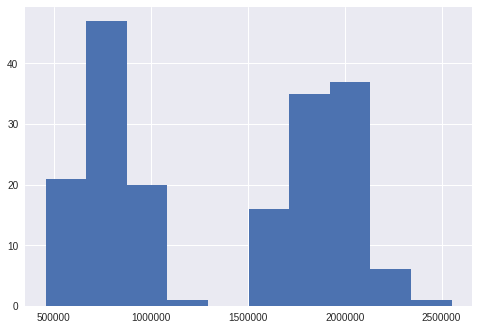

In [55]:
# baseline cells histogram
plt.hist(sum_baseline_new)
plt.show()

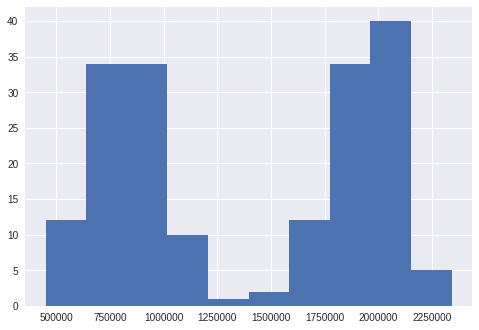

In [56]:
# metformin cells histogram
plt.hist(sum_metformin_new)
plt.show()

There is a slight difference between the histogram plots for baseline cells and for metformin-treated cells.
It is seen that values in the range of 10000-15000 occur the most.

### b.

In [0]:
# normalize the gene expression
normalize_gene_baseline = gene_baseline_new/sum_baseline_new
normalize_metf_baseline = gene_metformin_new/sum_metformin_new
sum_normalize_gene_baseline = round(normalize_gene_baseline.sum(axis = 0))
sum_normalize_metf_baseline = round(normalize_metf_baseline.sum(axis = 0))

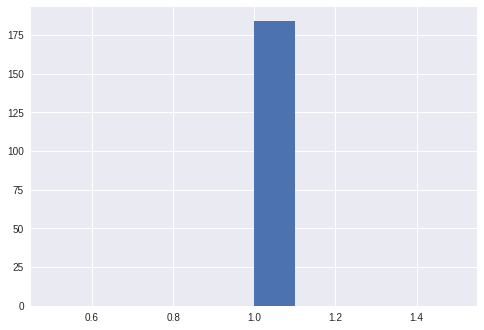

In [58]:
# plot the histogram of sum of normalized baseline cells
plt.hist(sum_normalize_gene_baseline)
plt.show()

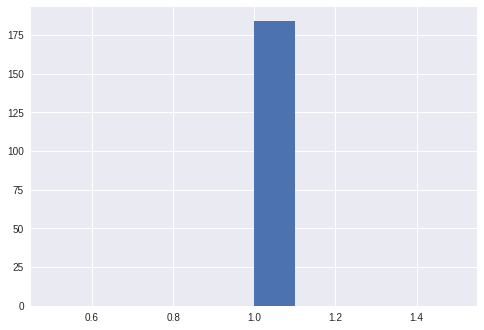

In [59]:
# plot the histogram of sum of normalized metformin cells
plt.hist(sum_normalize_metf_baseline)
plt.show()

## 3

### a.

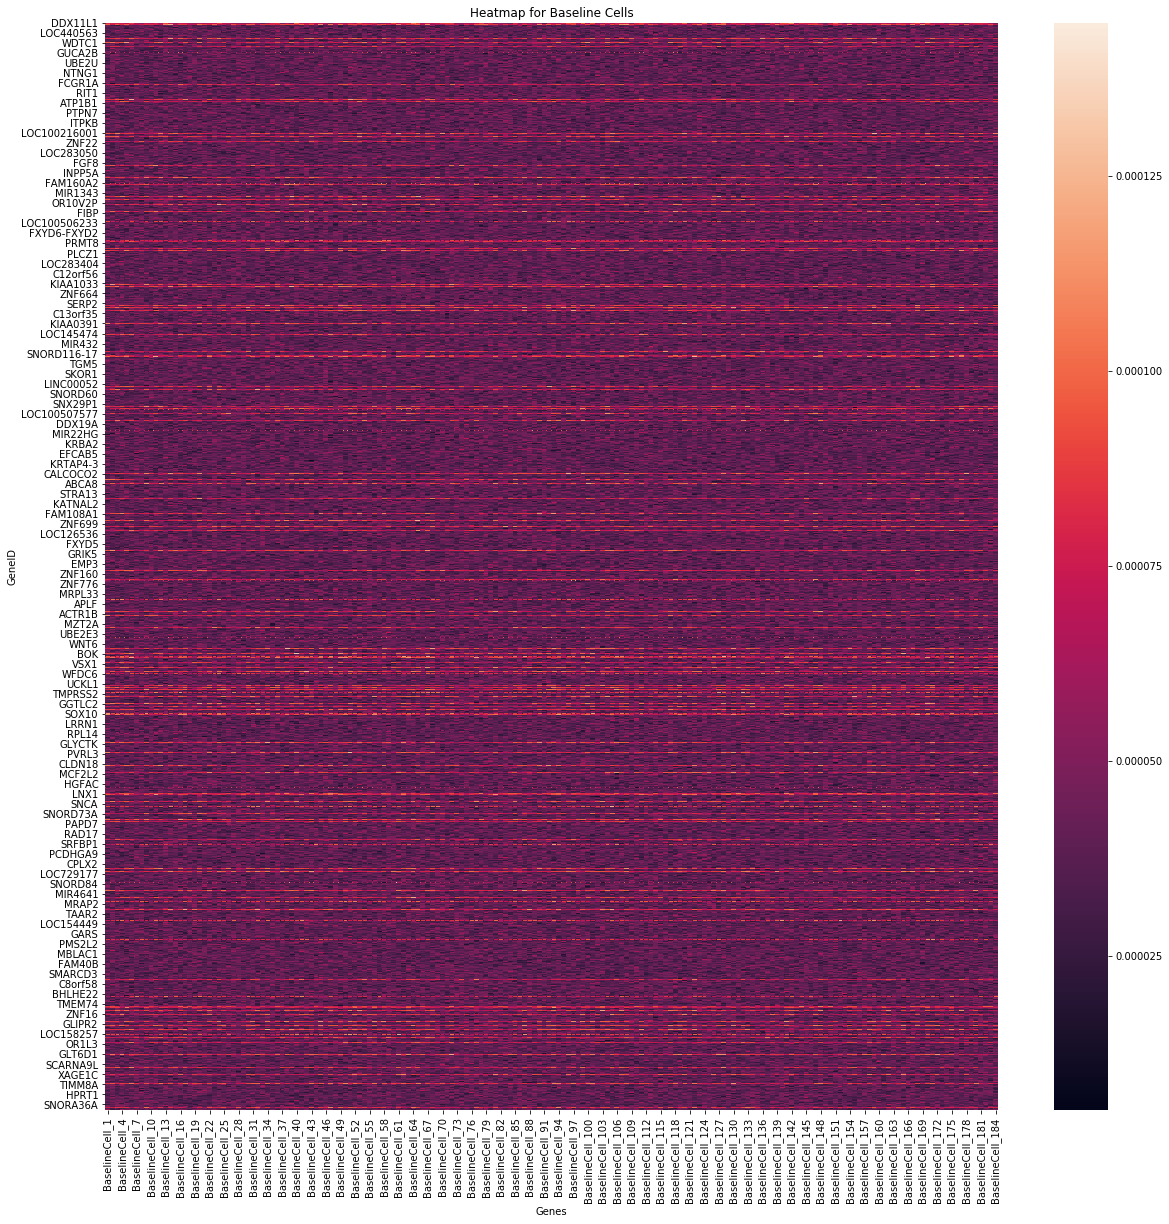

In [0]:
# heatmap for baseline cells
plt.figure(figsize = (20,20))
sns.heatmap(normalize_gene_baseline[normalize_gene_baseline.columns].astype(float))
plt.xlabel('Cells')
plt.xlabel('Genes')
plt.title('Heatmap for Baseline Cells')
plt.savefig('baseline.jpg')
plt.show()


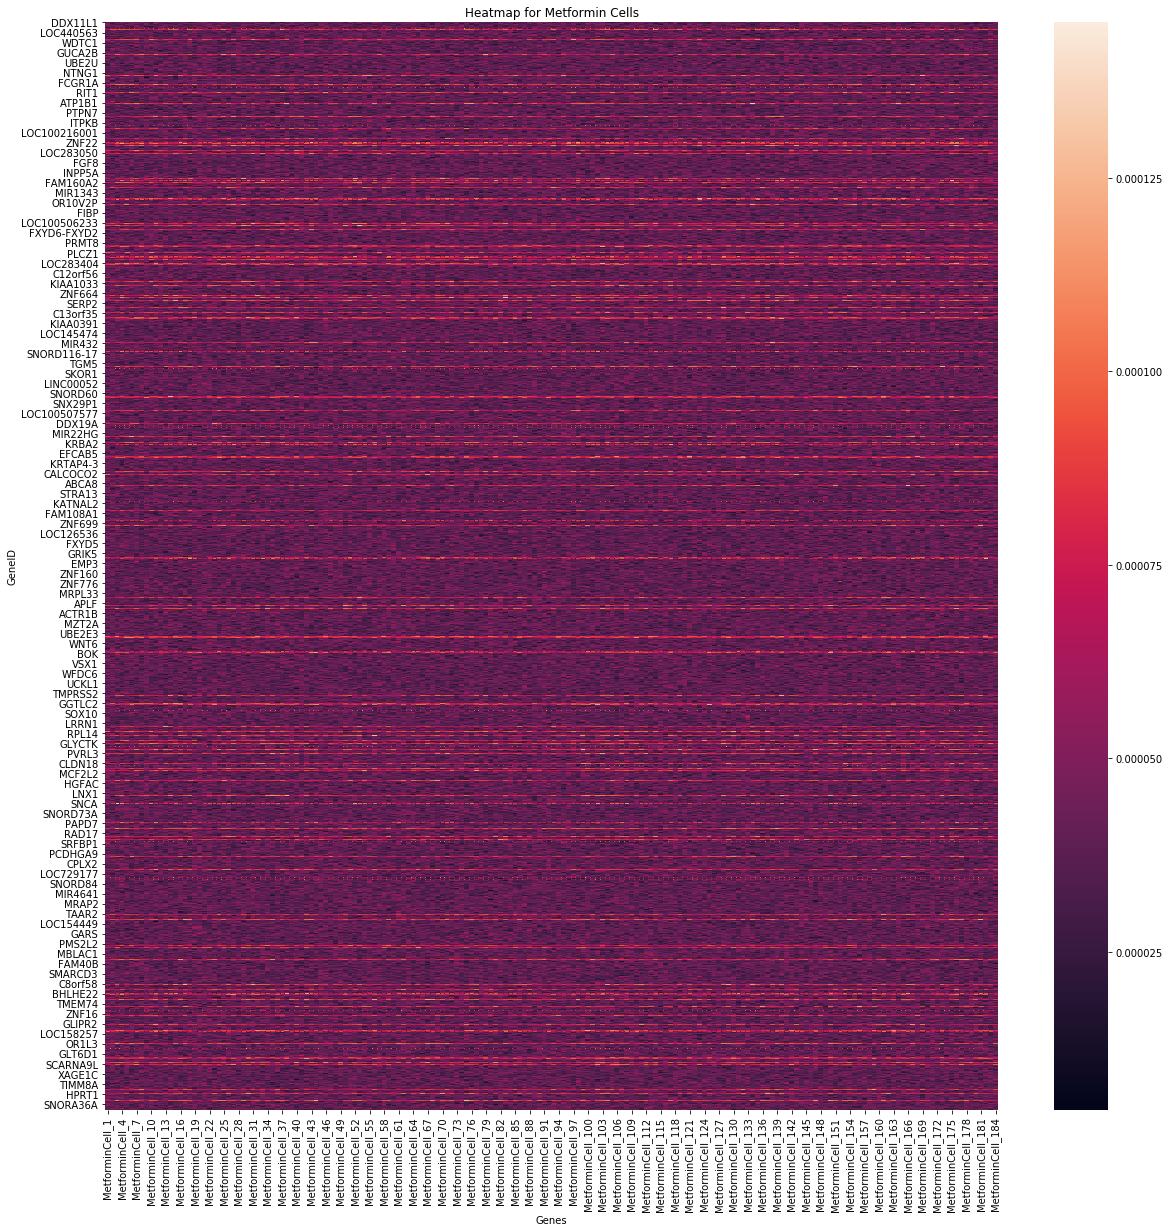

In [0]:
# heatmap for metformin cells
plt.figure(figsize = (20,20))
sns.heatmap(normalize_metf_baseline[normalize_metf_baseline.columns].astype(float))
plt.xlabel('Cells')
plt.xlabel('Genes')
plt.title('Heatmap for Metformin Cells')
plt.savefig('metformin.jpg')
plt.show()

The gene expression for baseline and metformin cells differ greatly for certain cells. We see gene expression for a particular gene (for eg. S1PR1) is quite different for both Baseline cells and Metformin cells.

### b.

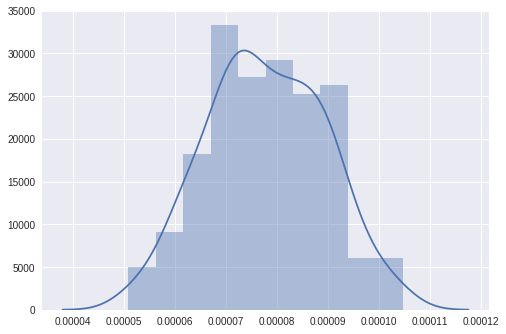

In [60]:
# Plot the distribution of baseline gene expression across all cells for KCND2
sns.distplot(normalize_gene_baseline[normalize_gene_baseline.index=='KCND2'])
plt.show()

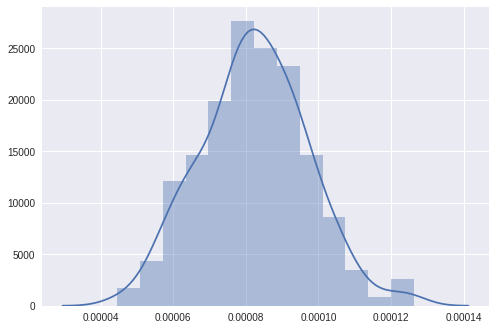

In [61]:
# Plot the distribution of baseline gene expression across all cells for TMEM239
sns.distplot(normalize_gene_baseline[normalize_gene_baseline.index=='TMEM239'])
plt.show()

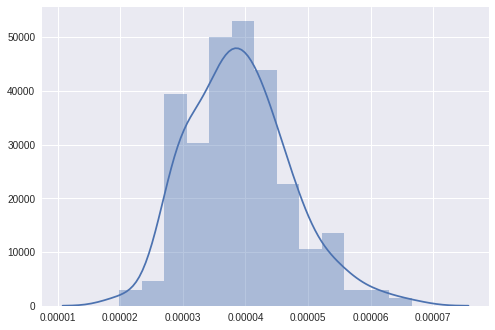

In [62]:
# Plot the distribution of baseline gene expression across all cells for LINC00336
sns.distplot(normalize_gene_baseline[normalize_gene_baseline.index=='LINC00336'])
plt.show()

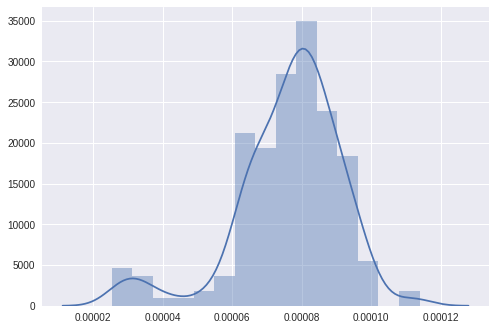

In [63]:
# Plot the distribution of metformin gene expression across all cells for KCND2
sns.distplot(normalize_metf_baseline[normalize_metf_baseline.index=='KCND2'])
plt.show()

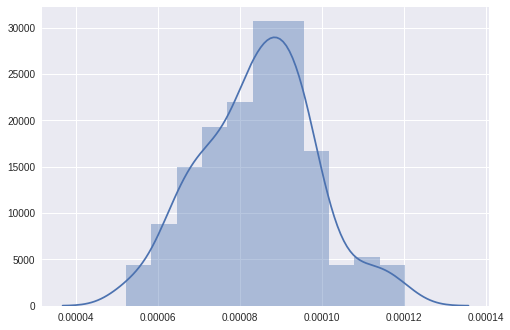

In [64]:
# Plot the distribution of metformin gene expression across all cells for TMEM239
sns.distplot(normalize_metf_baseline[normalize_metf_baseline.index=='TMEM239'])
plt.show()

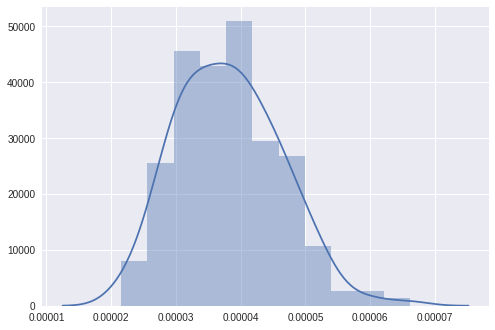

In [65]:
# Plot the distribution of metformin gene expression across all cells for LINC00336
sns.distplot(normalize_metf_baseline[normalize_metf_baseline.index=='LINC00336'])
plt.show()

### c.

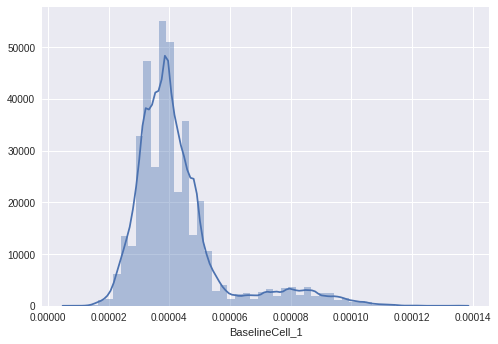

In [66]:
# Plot the distribution of baseline gene expression across all genes for BaselineCell_1
sns.distplot(normalize_gene_baseline['BaselineCell_1'])
plt.show()

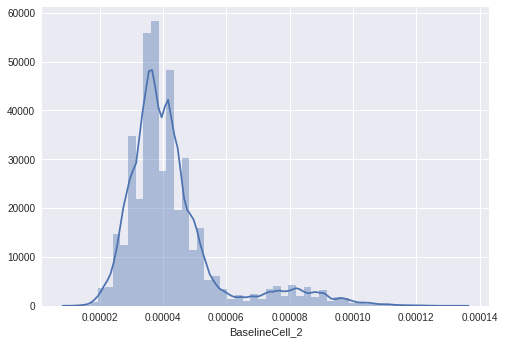

In [67]:
# # Plot the distribution of baseline gene expression across all genes for BaselineCell_2
sns.distplot(normalize_gene_baseline['BaselineCell_2'])
plt.show()

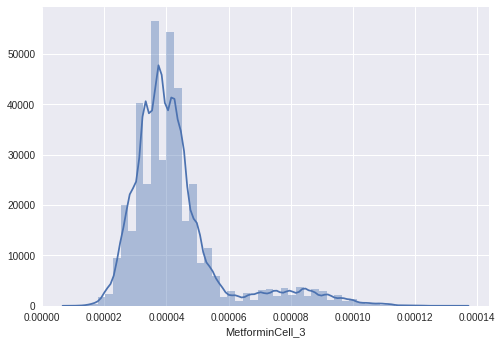

In [68]:
# Plot the distribution of metformin gene expression across all genes for MetforminCell_3
sns.distplot(normalize_metf_baseline['MetforminCell_3'])
plt.show()

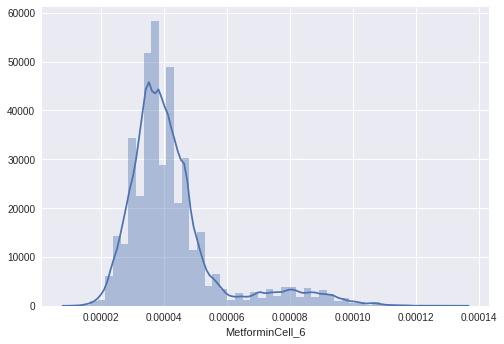

In [69]:
# Plot the distribution of metformin gene expression across all genes for MetforminCell_6
sns.distplot(normalize_metf_baseline['MetforminCell_6'])
plt.show()

# TASK 2

## 1

### a.

KS test is a non-parametric test. We should use a non parametric test when the assumptions for normally distributed data fail.

### b.

In [70]:
# the p-value of a two-sample KS test on its expression across baseline cells vs. metformin-treated cells
pvalue = []
for i in range(len(normalize_gene_baseline)):
    pvalue.append((stats.ks_2samp(normalize_gene_baseline.iloc[i,:-1], normalize_metf_baseline.iloc[i,:-1])[1]))    
print(len(pvalue))

23346


### c.

The null hypothesis of the KS test in this context is:
$H_{0}$: Both samples come from a population with the same distribution.

In [71]:
# take the first GeneID as an example:
stats.ks_2samp(normalize_gene_baseline.iloc[0,:-1], normalize_metf_baseline.iloc[0, :-1])[1]

0.941556498132223

### d.

In [0]:
# Count the number of genes with significantly altered expression at alpha=0.1, 0.05, 0.01, 0.005 and 0.001 level
count = []
count.append(sum([pvalue[i] < 0.1 for i in range(len(pvalue))]))
count.append(sum([pvalue[i] < 0.05 for i in range(len(pvalue))]))
count.append(sum([pvalue[i] < 0.01 for i in range(len(pvalue))]))
count.append(sum([pvalue[i] < 0.005 for i in range(len(pvalue))]))
count.append(sum([pvalue[i] < 0.001 for i in range(len(pvalue))]))

In [73]:
# summarize in a table
df_summary = pd.DataFrame(columns = ['alpha','count'])
df_summary['alpha'] = [0.1, 0.05, 0.01, 0.005, 0.001]
df_summary['count'] = count
df_summary

,alpha,count
0,0.100,2257
1,0.050,1342
2,0.010,319
3,0.005,160
4,0.001,40


## 2

### a.

According to hypothesis test for KS test, a p-value of less than 0.05 mean that the sample do not come from the same distriubtion and a p-value of greater than 0.05 mean that the sample comes from the same distribution.

### b.

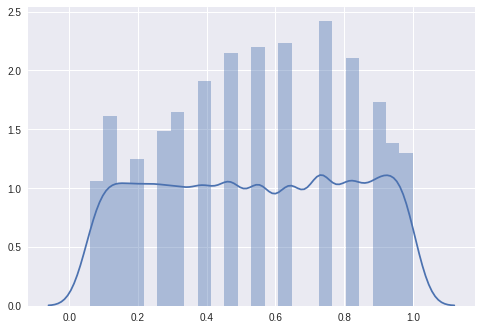

In [74]:
# if null is true, pvalue should be larger than 0.05
pvalue_large = []
pvalue_large.append([pvalue[i] for i in range(len(pvalue)) if pvalue[i]>0.05])
sns.distplot(pvalue_large)

Based on the above plot, if the null hypothesis is true, the p-value follows a uniform distribution.

### c.

In [75]:
# If no gene’s expression was altered, all pvalues are large enough to accept null.
count_alter = [0,0,0,0,0]
df_summary['count_alter'] = count_alter
df_summary

,alpha,count,count_alter
0,0.100,2257,0
1,0.050,1342,0
2,0.010,319,0
3,0.005,160,0
4,0.001,40,0


### d.

In [0]:
# generate N sample from Task 2.2.b, the distribution is uniform between 0.05 and 1
N = len(pvalue_large[0])
X = np.random.uniform(0.05,1,N)

# the -log10
log_pvalue_large = -np.log(pvalue_large)[0]
log_X = -np.log(X)

# Rank observed p-values and expected p-values in ascending order separately
log_pvalue_large = sorted(log_pvalue_large)
log_X = sorted(log_X)


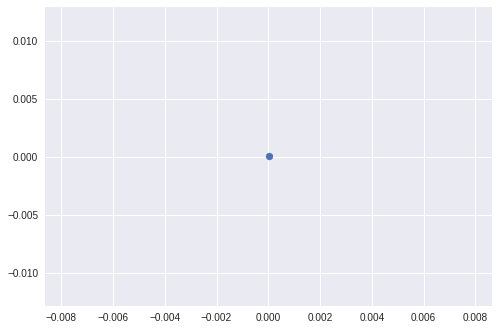

In [77]:
# plot the pair of smallest p-values
plt.scatter(log_X[0], log_pvalue_large[0])
plt.show()

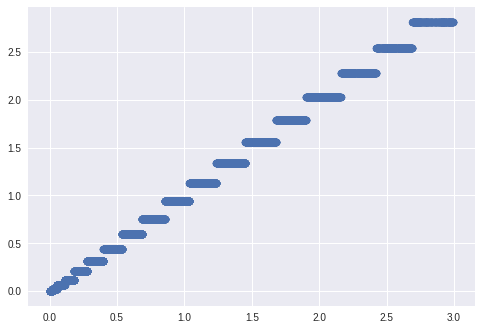

In [78]:
# plot all the pairs of smallest p-values
plt.scatter(log_X, log_pvalue_large)
plt.show()

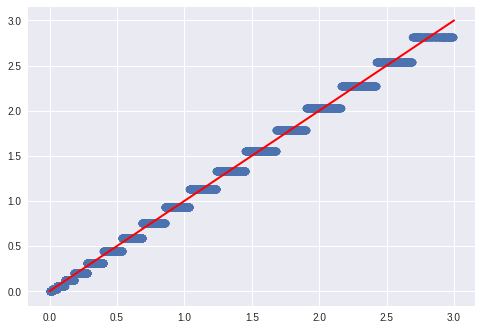

In [79]:
# add x=y line to scatter plot
plt.scatter(log_X, log_pvalue_large)
plt.plot([0, 3], [0, 3], color = 'red', linewidth = 2)
plt.show()

### e.

i. Taking -log10() helps in increasing the interval size.

ii. Since the Q-Q plot follows the 45 degree line y=x, we can conclude that both the distributions are identical i.e it comes from the uniform distribution. Thus, we accept the null hypothesis.

# TASK 3

### 1

### a.

In [0]:
# performing pca to find the principal components with the highest variation for baseline and metformin cells
pca_base = PCA(svd_solver = 'full')
pca_metf = PCA(svd_solver = 'full')

### b.

In [0]:
principalcomponents_base = pca_base.fit_transform(normalize_gene_baseline.T)
# first two principal components for baseline cells
list_pca_base = pca_base.explained_variance_ratio_
#principalcomponents_base.shape

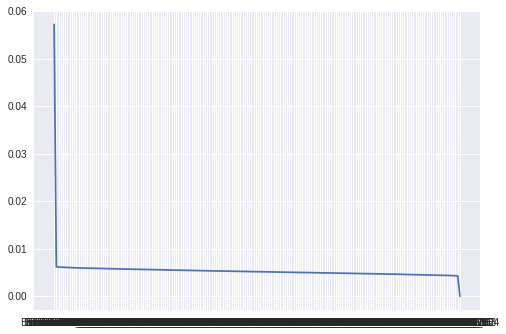

In [82]:
# plot a scree plot to show the fraction of total variance in the data as explained by each principal component 
plt.plot(normalize_gene_baseline.T.index, list_pca_base)

In [83]:
count_pca_base = 0
sum_pca_base = 0
for i in list_pca_base:
  sum_pca_base += i
  count_pca_base += 1
  if sum_pca_base > 0.3:
    break

# how many principal components are needed in order to explain 30% of the total variance?
print(count_pca_base)

43


In [0]:
principalcomponents_metf = pca_metf.fit_transform(normalize_metf_baseline.T)
# first two principal components for metformin cells
list_pca_metf = pca_metf.explained_variance_ratio_
#principalcomponents_base.shape


In [85]:
count_pca_metf = 0
sum_pca_metf = 0
for i in list_pca_metf:
  sum_pca_metf += i
  count_pca_metf += 1
  if sum_pca_metf > 0.3:
    break

# How many principal components are needed in order to explain 30% of the total variance?
print(count_pca_metf)

43


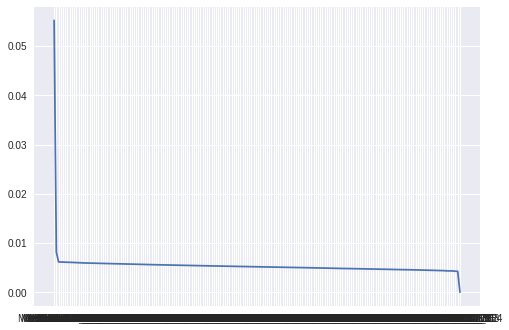

In [86]:
# plot a scree plot to show the fraction of total variance in the data as explained by each principal component 
plt.plot(normalize_metf_baseline.T.index, list_pca_metf)

### c.

In [0]:
# plot a scatter plot of the gene expression with the first two components for baseline cells
pca_base = PCA(n_components=2, svd_solver = 'full')
pca_base = pca_base.fit_transform(normalize_gene_baseline.T)
df_pca_base = pd.DataFrame(data = pca_base, columns = ['pca1', 'pca2'])


(-0.0005, 0.0005)

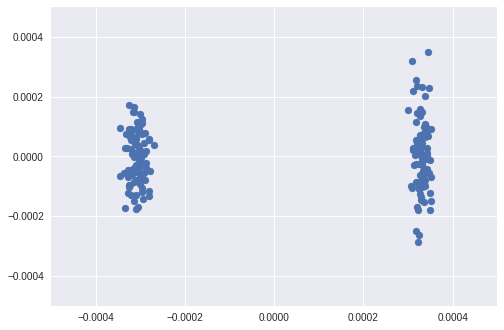

In [88]:
plt.scatter(df_pca_base['pca1'], df_pca_base['pca2'])
plt.xlim(-0.0005,0.0005)
plt.ylim(-0.0005, 0.0005)

In [0]:
# plot a scatter plot of the gene expression with the first two components for metformin cells
pca_metf = PCA(n_components=2, svd_solver = 'full')
pca_metf = pca_metf.fit_transform(normalize_metf_baseline.T)
df_pca_metf = pd.DataFrame(data = pca_metf
             , columns = ['pca1', 'pca2'])

(-0.0003, 0.0002)

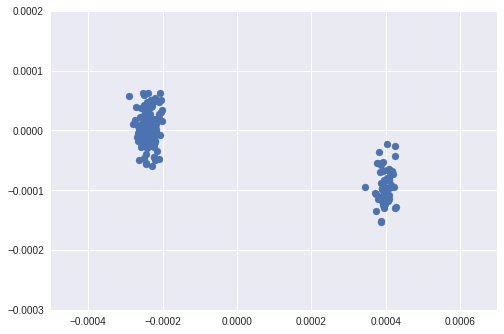

In [90]:
plt.scatter(df_pca_metf['pca1'], df_pca_metf['pca2'])
plt.xlim(-0.0005,0.0007)
plt.ylim(-0.0003, 0.0002)

## 2

### a.

In [0]:
tsne_base = TSNE(n_components=2).fit_transform(normalize_gene_baseline.T)
base = normalize_gene_baseline.T
df_tsne_base = pd.DataFrame(data = tsne_base
             , columns = ['tsne1', 'tsne2'])

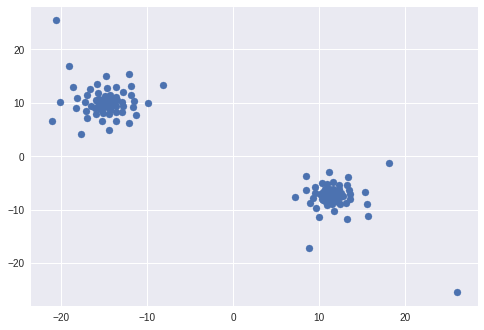

In [92]:
plt.scatter(df_tsne_base['tsne1'], df_tsne_base['tsne2'])

In [0]:
tsne_metf = TSNE(n_components=2).fit_transform(normalize_metf_baseline.T)
met = normalize_metf_baseline.T
df_tsne_metf = pd.DataFrame(data = tsne_metf
             , columns = ['tsne1', 'tsne2'])

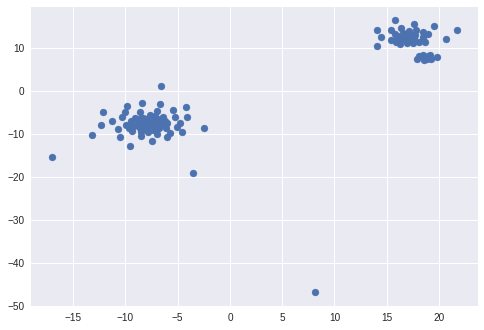

In [94]:
plt.scatter(df_tsne_metf['tsne1'], df_tsne_metf['tsne2'])

### b.

There is a stark difference in the result of PCA and t-sne. The clusters are formed at different places and there is a big difference in the scale as well.

## 3

### a.

### K-Means Clustering

baseline cells

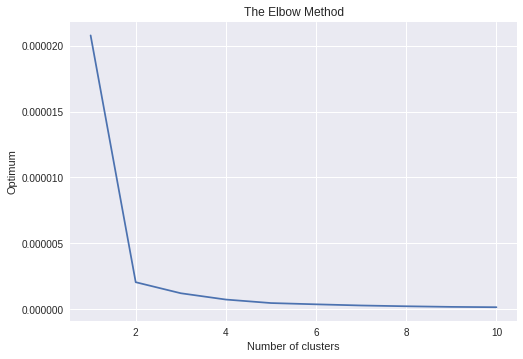

In [95]:
# to find the optimum number of clusters using kmeans
optimum = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(df_pca_base)
  # sum of squared distances of samples to their closest cluster center.
  optimum.append(kmeans.inertia_)
plt.plot(range(1, 11), optimum)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Optimum')
plt.show()

In [0]:
# fitting k means to the normalized baseline dataset
# we get 2 optimum clusters based on the elbow method above
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(df_pca_base)
label_base=y_kmeans


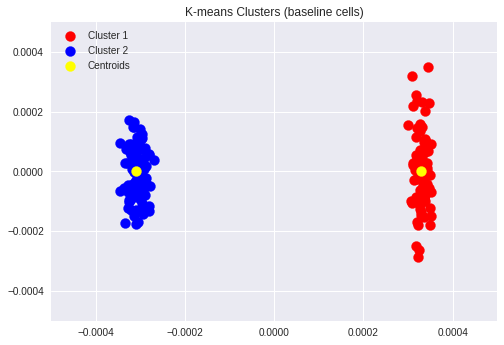

In [97]:
plt.scatter(np.array(df_pca_base.values)[y_kmeans == 0, 0], np.array(df_pca_base.values)[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(np.array(df_pca_base.values)[y_kmeans == 1, 0], np.array(df_pca_base.values)[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlim(-0.0005,0.0005)
plt.ylim(-0.0005, 0.0005)
plt.title('K-means Clusters (baseline cells)')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()

metformin cells

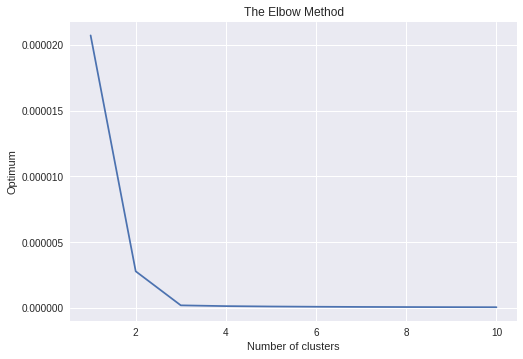

In [98]:
# to find the optimum number of clusters using kmeans
optimum = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(df_pca_metf)
  # sum of squared distances of samples to their closest cluster center.
  optimum.append(kmeans.inertia_)
plt.plot(range(1, 11), optimum)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Optimum')
plt.show()

In [0]:
# fitting k means to the normalized metformin dataset
# we get 3 optimum clusters based on the elbow method above
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(df_pca_metf)
label_metf=y_kmeans

met_labels: [-0.0002362   0.00039811  0.00049431] [ 5.93344087e-06 -9.14401602e-05  4.51787655e-04]


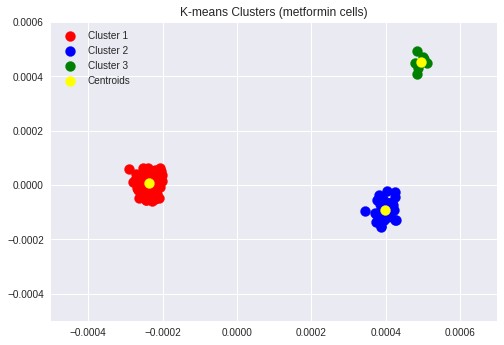

In [100]:
plt.scatter(np.array(df_pca_metf.values)[y_kmeans == 0, 0], np.array(df_pca_metf.values)[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(np.array(df_pca_metf.values)[y_kmeans == 1, 0], np.array(df_pca_metf.values)[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(np.array(df_pca_metf.values)[y_kmeans == 2, 0], np.array(df_pca_metf.values)[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
print("met_labels:",kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.xlim(-0.0005,0.0007)
plt.ylim(-0.0005, 0.0006)
plt.title('K-means Clusters (metformin cells)')
#plt.xlabel(')
#plt.ylabel('')
plt.legend()
plt.show()

### b.

### Gaussian Mixture Model Clustering

baseline cells

In [0]:
# fitting GMM to the normalized baseline dataset
# we get 2 optimum components based on the elbow method above
gmm_baseline = GaussianMixture(n_components = 2, random_state = 0)
#df_pca_base.pca1 *= 1000
#df_pca_base.pca2 *= 1000
y_gmm_baseline = gmm_baseline.fit(df_pca_base*1000).predict(df_pca_base*1000)


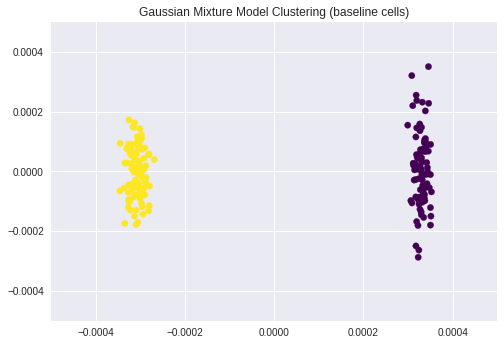

In [102]:
plt.scatter(np.array(df_pca_base.values)[:, 0], np.array(df_pca_base.values)[:, 1], c=y_gmm_baseline, s=40, cmap='viridis')
plt.xlim(-0.0005,0.0005)
plt.ylim(-0.0005, 0.0005)
plt.title('Gaussian Mixture Model Clustering (baseline cells)')
#plt.xlabel('')
#plt.ylabel('')
#plt.legend()
plt.show()

metformin cells

In [0]:
# fitting GMM to the normalized baseline dataset
# we get 3 optimum components based on the elbow method above
gmm_metformin = GaussianMixture(n_components = 3, random_state = 0)
y_gmm_metformin = gmm_metformin.fit(df_pca_metf*1000).predict(df_pca_metf*1000)

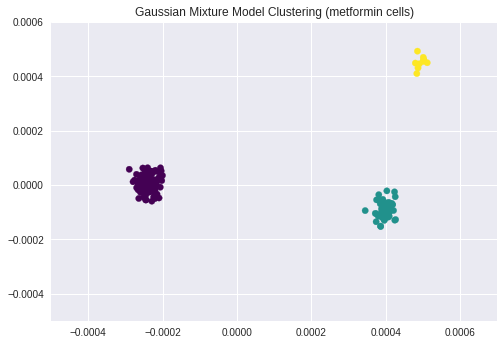

In [104]:
plt.scatter(np.array(df_pca_metf.values)[:, 0], np.array(df_pca_metf.values)[:, 1], c=y_gmm_metformin, s=40, cmap='viridis')
plt.xlim(-0.0005,0.0007)
plt.ylim(-0.0005, 0.0006)
plt.title('Gaussian Mixture Model Clustering (metformin cells)')
#plt.xlabel('')
#plt.ylabel('')
#plt.legend()
plt.show()

### c.

### Single Linkage Hierarchical Clustering

baseline cells

In [0]:
# fitting Agglomerative Clustering to the normalized baseline dataset
# we get 2 optimum clusters based on the elbow method above
single_hier_baseline = AgglomerativeClustering(n_clusters = 2, linkage='single')
y_single_hier_baseline = single_hier_baseline.fit_predict(df_pca_base)

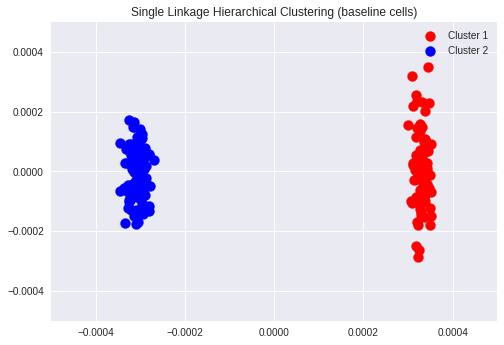

In [106]:
plt.scatter(np.array(df_pca_base.values)[y_single_hier_baseline == 0, 0], np.array(df_pca_base.values)[y_single_hier_baseline == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(np.array(df_pca_base.values)[y_single_hier_baseline == 1, 0], np.array(df_pca_base.values)[y_single_hier_baseline == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.xlim(-0.0005,0.0005)
plt.ylim(-0.0005, 0.0005)
plt.title('Single Linkage Hierarchical Clustering (baseline cells)')

plt.legend()
plt.show()

metformin cells

In [0]:
# fitting Agglomerative Clustering to the normalized baseline dataset
# we get 2 optimum clusters based on the elbow method above
single_hier_metformin = AgglomerativeClustering(n_clusters = 3, linkage='single')
y_single_hier_metformin = single_hier_metformin.fit_predict(df_pca_metf)

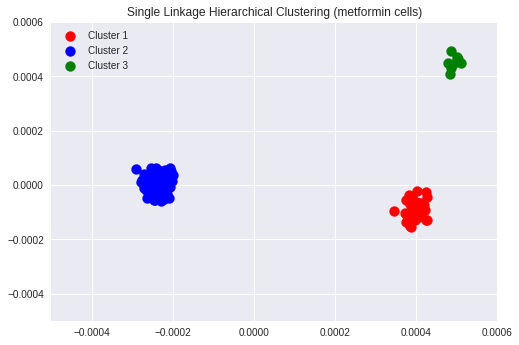

In [108]:
plt.scatter(np.array(df_pca_metf.values)[y_single_hier_metformin == 0, 0], np.array(df_pca_metf.values)[y_single_hier_metformin == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(np.array(df_pca_metf.values)[y_single_hier_metformin == 1, 0], np.array(df_pca_metf.values)[y_single_hier_metformin == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(np.array(df_pca_metf.values)[y_single_hier_metformin == 2, 0], np.array(df_pca_metf.values)[y_single_hier_metformin == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlim(-0.0005,0.0006)
plt.ylim(-0.0005, 0.0006)
plt.title('Single Linkage Hierarchical Clustering (metformin cells)')
#plt.xlabel('')
#plt.ylabel('')
plt.legend()
plt.show()

### d.

K-Means Clustering, Gaussian Mixture Model Clustering & Single Linkage Hierarchical Clustering all gave identical results. <br>

Out of the three, K-Means Clustering is my preferred choice.
I decided the number of clusters based on the 'elbow method' due to which I was able to find the optimum number of clusters for applying k-means method. intertia_ attribute of K-Means Clustering (sklearn) gives the sum of squared distances of samples to their closest cluster center. This makes it easier to find the optimum number of clusters based on dataset. <br>

Using the KMeans function, I was able to plot the clusters based on normalized baseline and metformin dataset. I also showed the centroid for each cluster which I have indicated in the legends of the chart.

# Task 4

# a.

For each metformin-treated subpopulations, determine whether or not it is affected by
metformin.

In [0]:
# label_base: predict labels of baseline cells after k-means model
# label_metf: predict labels of metformin cells after k-means model
# build up new dataframe
base['base_clus']=label_base
met['met_clus']=label_metf
met_mod = [met.loc[met['met_clus']==0].drop(columns=['met_clus']),met.loc[met['met_clus']==1].drop(columns=['met_clus']),met.loc[met['met_clus']==2].drop(columns=['met_clus'])]
base_mod = [base.loc[base['base_clus']==0].drop(columns=['base_clus']),base.loc[base['base_clus']==1].drop(columns=['base_clus'])]

met_mean= [df.mean() for df in met_mod]
base_mean = [df.mean() for df in base_mod]

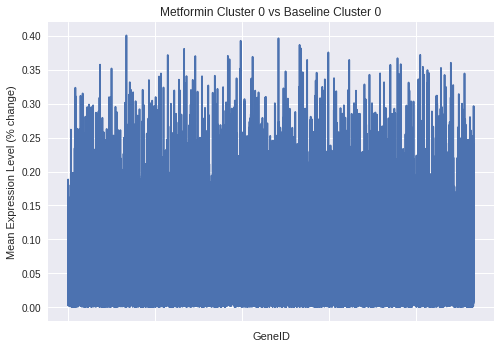

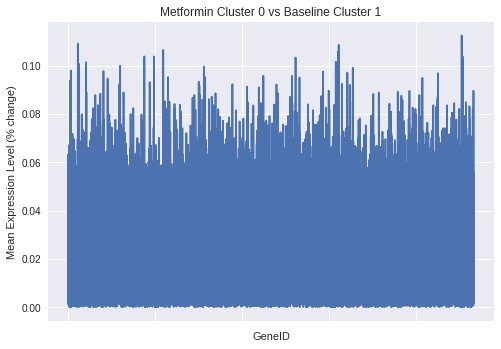

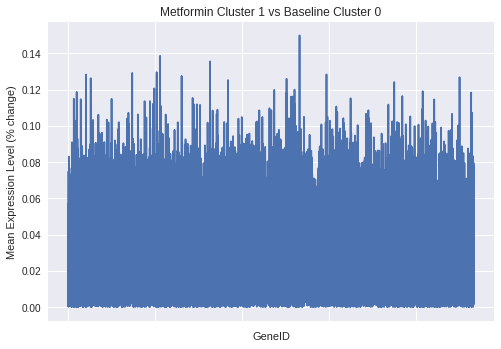

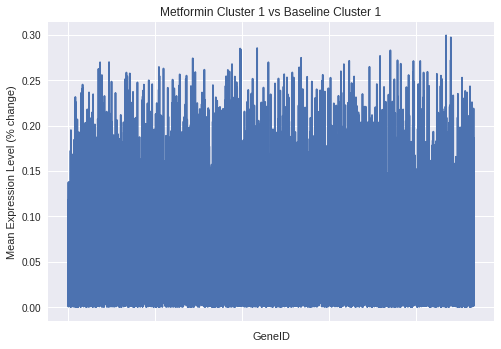

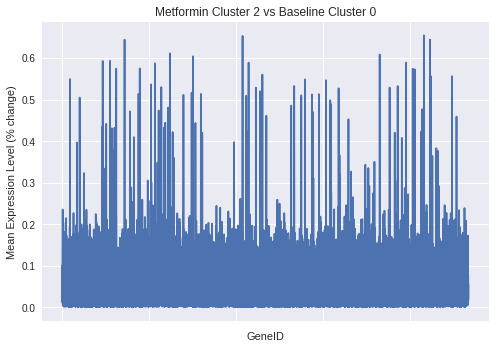

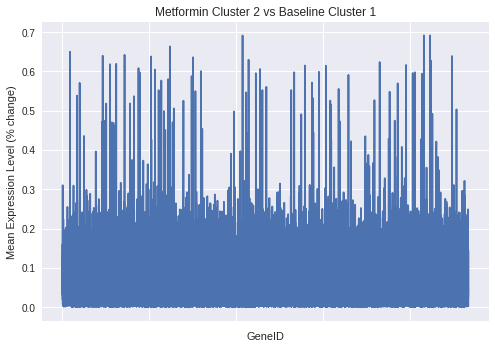

In [110]:
# percentage change of each gene
# total number of graph: 2*3=6
for i in range(len(met_mean)):
    for j in range(len(base_mean)):
        met_mean[i].sub(base_mean[j]).abs().divide(base_mean[j]).plot(title=('Metformin Cluster '+str(i)+' vs Baseline Cluster '+str(j)))
        plt.ylabel("Mean Expression Level (% change)")
        plt.show()
        

based on above plots, it shows that metformin cluster 2 is affected by the metformin as a select number of genes have a very large difference in expression level. metformin cluster 0 and 1 are  slightly changed by metformin.

# b.

For each affected subpopulations M i,  identify the baseline subpopulation that M i  is most
similar to.

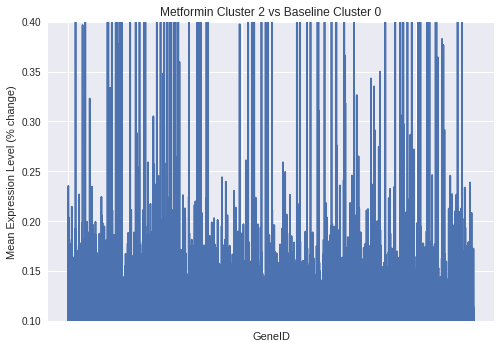

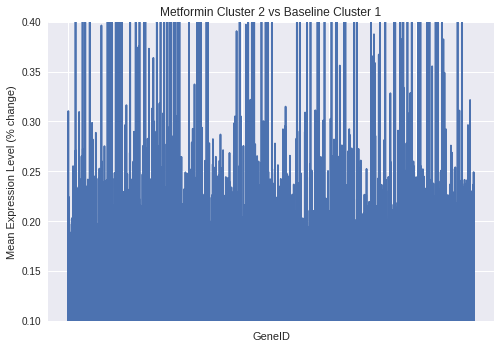

In [111]:
metf_cluster = 2
for i in range(len(base_mean)):
    met_mean[metf_cluster].sub(base_mean[i]).abs().divide(base_mean[i]).plot(title=('Metformin Cluster '+str(metf_cluster)+' vs Baseline Cluster '+str(i)),ylim=[0.1,0.4])
    plt.ylabel("Mean Expression Level (% change)")
    plt.show()

In [0]:
base_cluster = 0

based on above two plots, we can see metformin cluster 2 shows less differences when compared with baseline cluster 0, for genes which were not significantly altered.

# c.

Identify genes with significantly altered expression by comparing each affected
subpopulation with its corresponding baseline subpopulation. 

In [113]:
# perform KS test with alpha=0.0000025 to identify the genes with significantly altered expression.
alpha_val = 0.0000025 
gene_identification = [] 
for geneID in met_mod[metf_cluster]:
    _, pval = stats.ks_2samp(met_mod[metf_cluster][geneID], base_mod[base_cluster][geneID])
    if(pval < alpha_val):
      gene_identification.append(geneID)
        
print(len(gene_identification))

76


In [114]:
# name of gene with significantly altered
gene_identification

['TRNP1',
 'OMA1',
 'LRRC8D',
 'LOC653513',
 'LOC339529',
 'OR2AK2',
 'PHYH',
 'LOC100507605',
 'SPOCK2',
 'LOC728190',
 'TCTN3',
 'PIK3AP1',
 'MIR608',
 'MIR4295',
 'HPS5',
 'LINC00301',
 'B3GNT1',
 'SRSF8',
 'C11orf92',
 'CDKN1B',
 'DHH',
 'RDH16',
 'CCDC59',
 'RMST',
 'SDS',
 'LOC116437',
 'RNF6',
 'GUCY1B2',
 'SLC15A1',
 'MRPL52',
 'MIR409',
 'LOC283663',
 'MYO1E',
 'SNORD18A',
 'IDH3A',
 'PGP',
 'VASN',
 'CEP112',
 'SNORA37',
 'ZNF57',
 'NRTN',
 'TRAPPC5',
 'LOC284395',
 'CYP2A6',
 'ERCC2',
 'C19orf63',
 'NAB1',
 'PRKAG3',
 'SSTR4',
 'HNF4A',
 'LINC00310',
 'DSCAM-AS1',
 'MIR3928',
 'BTD',
 'TCTA',
 'GNAI2',
 'NPHP3',
 'GBA3',
 'RANBP9',
 'IL17F',
 'TMEM244',
 'OSTCP1',
 'SKAP2',
 'AUTS2',
 'KCND2',
 'FAM71F1',
 'CREB3L2',
 'SORBS3',
 'CCDC25',
 'SGK196',
 'MYC',
 'LINC00051',
 'GML',
 'MELK',
 'LOC100507244',
 'FAM47A']

# 2.a

The most common pathways these genes are associated with.

In [0]:

pathway_count = {}
new_genes = gene_identification.copy()

pathway_dictionary = open('PathwayDictionary.txt', 'r')

# split content we need 
for line in pathway_dictionary: 
    pathway, pathway_genes = line.split(':')
    pathway_genes = pathway_genes.strip('\n')
    involved_genes = pathway_genes.split(',')
    pathway_count[pathway] = 0
    for gene in gene_identification:
        if gene in involved_genes:
            pathway_count[pathway] += 1
            if gene in new_genes: 
                new_genes.remove(gene)              

In [0]:
common_pathway = sorted(pathway_count.items(), key=lambda kv: kv[1], reverse=True)

In [117]:
common_pathway

[('Wnt signaling pathway', 31),
 ('Notch signaling pathway', 20),
 ('Proline biosynthesis', 3),
 ('Alanine biosynthesis', 2),
 ('Beta1 adrenergic receptor signaling pathway', 2),
 ('Heterotrimeric G-protein signaling pathway-Gq alpha and Go alpha mediated pathway',
  2),
 ('Hypoxia response via HIF activation', 2),
 ('Nicotinic acetylcholine receptor signaling pathway', 2),
 ('5HT4 type receptor mediated signaling pathway', 1),
 ('5-Hydroxytryptamine degredation', 1),
 ('ALP23B signaling pathway', 1),
 ('Anandamide degradation', 1),
 ('Arginine biosynthesis', 1),
 ('Axon guidance mediated by semaphorins', 1),
 ('Axon guidance mediated by Slit/Robo', 1),
 ('Coenzyme A linked carnitine metabolism', 1),
 ('Cell cycle', 1),
 ('Circadian clock system', 1),
 ('Cobalamin biosynthesis', 1),
 ('Coenzyme A biosynthesis', 1),
 ('Cytoskeletal regulation by Rho GTPase', 1),
 ('De novo pyrimidine ribonucleotides biosythesis', 1),
 ('Enkephalin release', 1),
 ('Flavin biosynthesis', 1),
 ('Gamma-amin

the most common way is : Wnt signaling pathway

# b.

In [118]:
print(new_genes)
print(len(new_genes))

['LOC339529', 'C11orf92', 'SDS', 'GUCY1B2', 'VASN', 'CEP112', 'CYP2A6', 'PRKAG3', 'NPHP3', 'GBA3', 'SKAP2', 'KCND2', 'CREB3L2', 'LOC100507244', 'FAM47A']
15
